# Legends
Here we show how to edit the Legends to a plot, show typical pitfalls
and how to avoid/solve/workaround them.

### Get Example Data

In [1]:
import plotastic as plst

# Import Example Data
DF, _dims = plst.load_dataset("fmri", verbose=False)

DF.head()

,Unnamed: 0,subject,timepoint,event,region,signal
0,17,s7,9,stim,parietal,0.058897
1,36,s8,9,stim,parietal,0.170227
2,67,s0,0,stim,frontal,-0.021452
3,84,s1,0,stim,parietal,-0.064454
4,127,s13,9,stim,parietal,0.013245


In [2]:
# Define dimensions explicitly
dims = dict(
    y="signal",
    x="timepoint",
    hue="event",
    col="region",
)

# Make DataAnalysis object
DA = plst.DataAnalysis(
    data=DF,  # Dataframe
    dims=dims,  # Dictionary with y, x, hue, col, row
    subject="subject",  # Data is paired by subject (optional)
    verbose=True,  # Print out Info about the Data
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (40 total) have the same samplesize n = 14.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['region', 'event'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


## Display correct labels
Legend uses handles and labels from the plot that was previously called! 

### *"Wrong"*:
Legend Labels are useless, since  `fillaxes(kind="bar",
fill=False)` removes colors from the barplot!

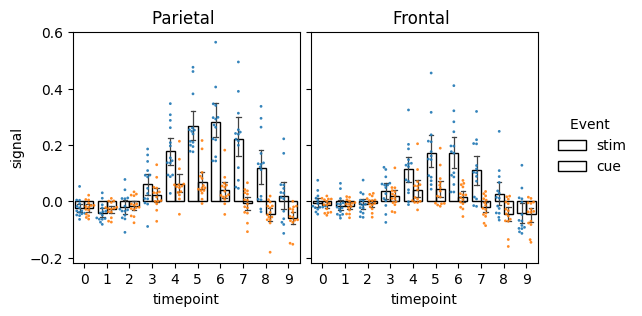

In [3]:
(
    DA.subplots(figsize=(6, 3))
    .fillaxes(kind="swarm", s=2, alpha=0.9, dodge=True)
    .fillaxes(kind="bar", fill=False, errwidth=0.9, capsize=0.2)
    .edit_legend()  # !! Calling Legend here uses labels from barplot!
)

### *Correct:*

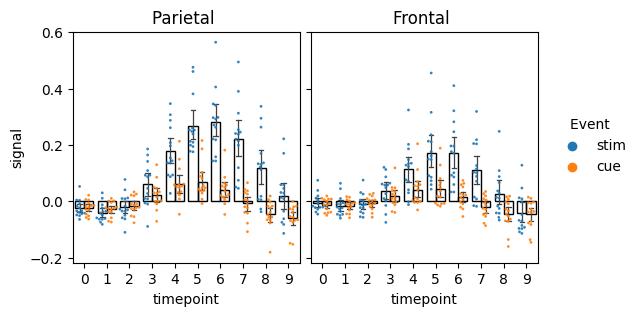

In [4]:
(
    DA.subplots(figsize=(6, 3))
    .fillaxes(kind="swarm", s=2, alpha=0.9, dodge=True)
    .edit_legend()  # !! Calling Legend here uses labels from swarmplot!
    .fillaxes(kind="bar", fill=False, errwidth=0.9, capsize=0.2)
)

## Legend Positioning
God, that's an annoying one..! You got the following options to pass to `edit_legend()`:
- `bbox_to_anchor: tuple = (1.15, 0.50)`
- `borderaxespad: float = 4`
- `pad: float = None`

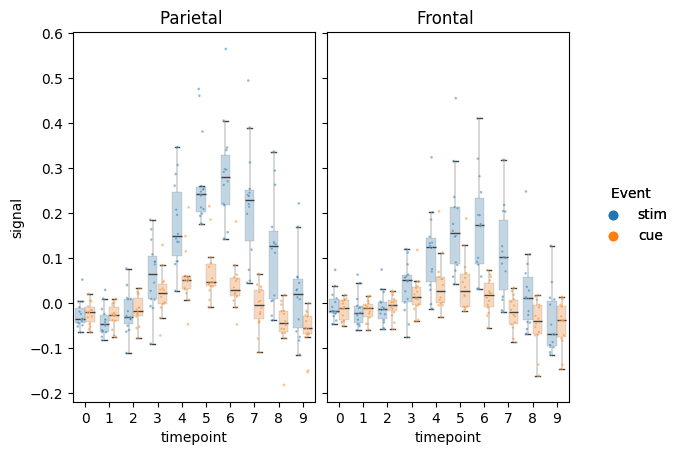

In [6]:
DA.plot_box_strip().edit_legend(
    bbox_to_anchor=(1.15, 0.50), 
    borderaxespad=4, 
    pad=None
)